In [1]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Using TensorFlow backend.


In [0]:
# Size of encoded representation
encoding_dim = 32

# Input placeholder
input_img = Input(shape=(784,))

# Encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Lossy reconstruction of input
decoded = Dense(784, activation='sigmoid')(encoded)

# Map input to its reconstruction
autoencoder = Model(input_img, decoded)

In [0]:
# Map input to encoded representation
encoder = Model(input_img, encoded)

# Placeholder for encoded input
encoded_input = Input(shape=(encoding_dim,))

# Retrieve the last layer of autoencoder model
decoder_layer = autoencoder.layers[-1]

# Map encoded representation to reconstruction
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
# Specify loss function
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
# Normalize values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten into vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256, # numver of samples used in forward and back pass
                shuffle=True,
                validation_data=(x_test, x_test)) # data on which loss is estimated after each epoch

W0728 22:12:05.755203 139833110976384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.3564 - val_loss: 0.2705
Epoch 2/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.2630 - val_loss: 0.2519
Epoch 3/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.2417 - val_loss: 0.2291
Epoch 4/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.2211 - val_loss: 0.2113
Epoch 5/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.2064 - val_loss: 0.1990
Epoch 6/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.1953 - val_loss: 0.1889
Epoch 7/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1863 - val_loss: 0.1809
Epoch 8/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.1790 - val_loss: 0.1746
Epoch 9/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.1732 - val_loss: 0.1692
Epoch

In [0]:
# Encode and decode images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

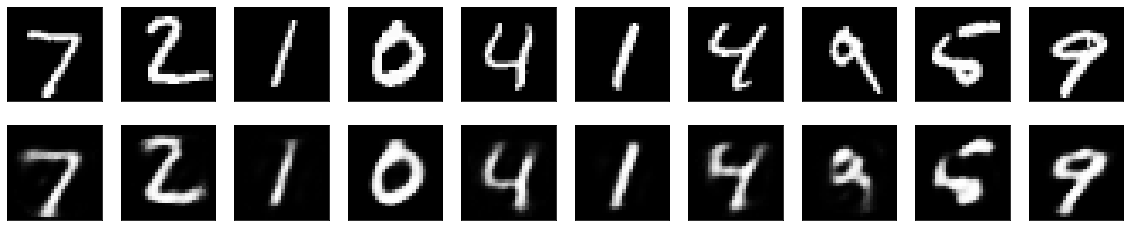

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [12]:
encoded_imgs.mean()

7.5999804